In [87]:
import pandas as pd
import os

data_dir = os.path.abspath(os.path.join("..", "data"))

df = pd.read_csv("../simulation_results_bf_4nano.csv")
df.head()

,test_name,simulation_id,ticks,success
0,Move (BF1),test-967560,1,True
1,Move (BF1),test-e3dfca,1,True
2,Move (BF1),test-7b1ae4,1,True
3,Move (BF1),test-cc6d76,1,True
4,Move (BF1),test-188b30,1,True


/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_73711/3040304437.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


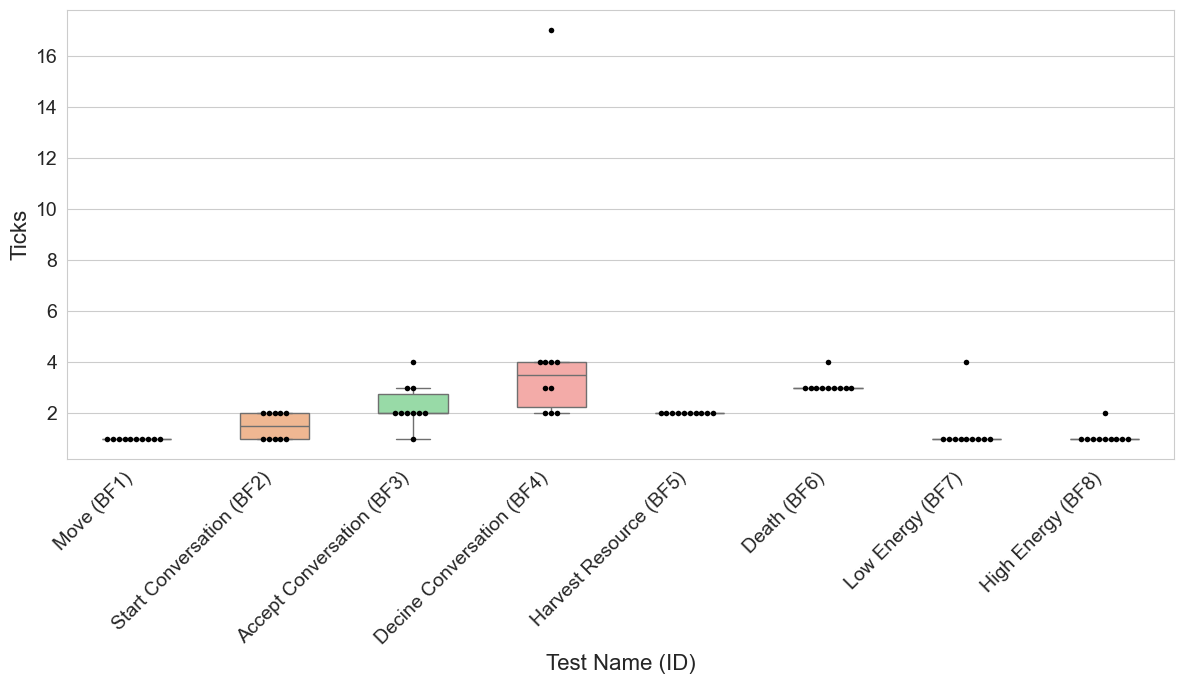

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Fixed order of test names for sorting from BF1 to BF8
order = [
    "Move (BF1)",
    "Start Conversation (BF2)",
    "Accept Conversation (BF3)",
    "Decine Conversation (BF4)",
    "Harvest Resource (BF5)",
    "Death (BF6)",
    "Low Energy (BF7)",
    "High Energy (BF8)"
    ]

plt.figure(figsize=(12, 7))

# Boxplot: shows min, Q1, median, Q3, max
sns.boxplot(
    x="test_name",
    y="ticks",
    data=df,
    order=order,
    palette="pastel",
    width=0.5,
    showfliers=False,  # Hide outliers, shown in swarm plot
)

# Swarmplot: shows all actual data points
sns.swarmplot(
    x="test_name",
    y="ticks",
    data=df,
    order=order,
    color="black",
    size=4,
)

plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
#plt.title("Basic Functionality Tests", fontsize=16)
plt.xlabel("Test Name (ID)", fontsize=16)
plt.ylabel("Ticks", fontsize=16)
plt.tight_layout()
plt.savefig(("test_results.png"), dpi=300)
plt.show()

In [89]:
import pandas as pd
import os

data_dir = os.path.abspath(os.path.join("..", "data"))

df = pd.read_csv("../simulation_results_ps_4nano.csv")
df.head()

,test_name,simulation_id,ticks,success
0,Two Agent Resource (PS1),test-389b31,10,True
1,Two Agent Resource (PS1),test-317f45,9,True
2,Two Agent Resource (PS1),test-bc6db5,28,True
3,Two Agent Resource (PS1),test-f29589,17,True
4,Two Agent Resource (PS1),test-677c27,16,True


/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_73711/1691273817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


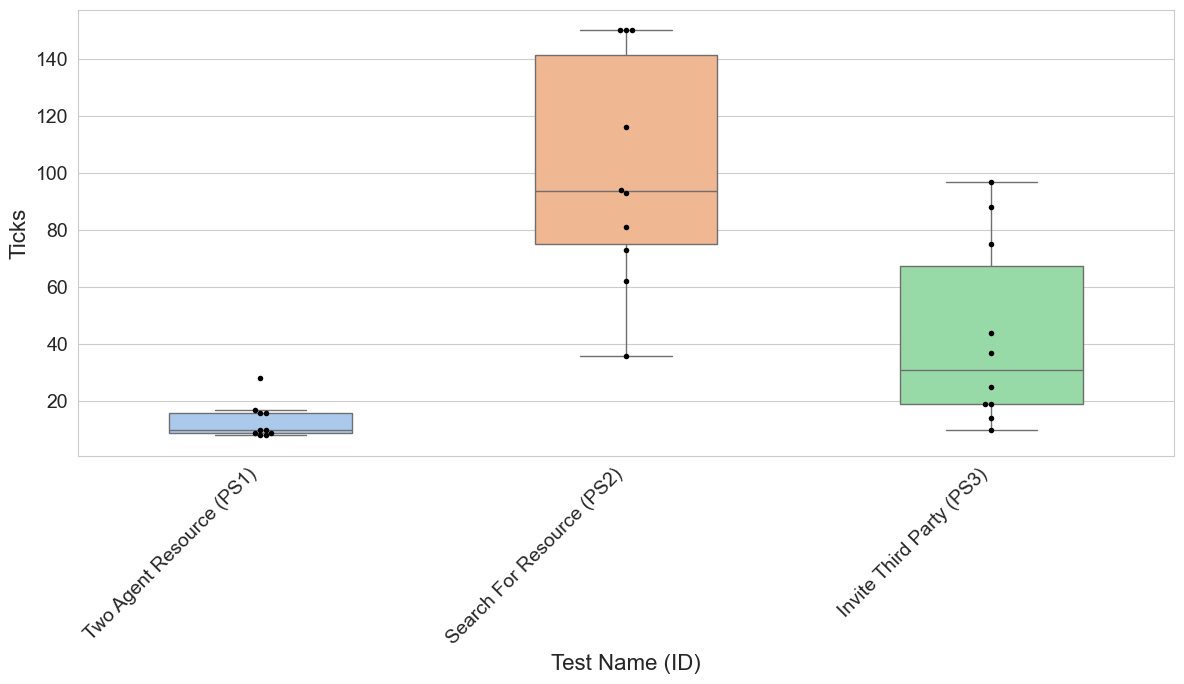

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Fixed order of test names for sorting from PS1 to PS3
order = [
    "Two Agent Resource (PS1)",
    "Search For Resource (PS2)",
    "Invite Third Party (PS3)"
    ]

plt.figure(figsize=(12, 7))

# Boxplot: shows min, Q1, median, Q3, max
sns.boxplot(
    x="test_name",
    y="ticks",
    data=df,
    order=order,
    palette="pastel",
    width=0.5,
    showfliers=False,  # Hide outliers, shown in swarm plot
)

# Swarmplot: shows all actual data points
sns.swarmplot(
    x="test_name",
    y="ticks",
    data=df,
    order=order,
    color="black",
    size=4,
)

plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
#plt.title("Basic Functionality Tests", fontsize=16)
plt.xlabel("Test Name (ID)", fontsize=16)
plt.ylabel("Ticks", fontsize=16)
plt.tight_layout()
plt.savefig(("test_results.png"), dpi=300)
plt.show()

In [ ]:
import pandas as pd
import re
import os

# Helper function to extract the number from the test name
def extract_id(test_name):
    match = re.search(r'\((BF|PS)(\d+)\)', test_name)
    if match:
        prefix, num = match.groups()
        return f"{prefix}{int(num):02d}"
    return test_name

# For BF files
for fname in ["../simulation_results_bf_4nano.csv", "../simulation_results_bf_grok.csv"]:
    df = pd.read_csv(fname)
    df['sort_id'] = df['test_name'].apply(extract_id)
    df = df.sort_values('sort_id')
    df.drop(columns='sort_id', inplace=True)
    outname = f"{os.path.basename(fname)}"
    df.to_csv(outname, index=False)

# For PS files
for fname in ["../simulation_results_ps_4nano.csv", "../simulation_results_ps_grok.csv"]:
    df = pd.read_csv(fname)
    df['sort_id'] = df['test_name'].apply(extract_id)
    df = df.sort_values('sort_id')
    df.drop(columns='sort_id', inplace=True)
    outname = f"{os.path.basename(fname)}"
    df.to_csv(outname, index=False)

/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_73711/1308548918.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


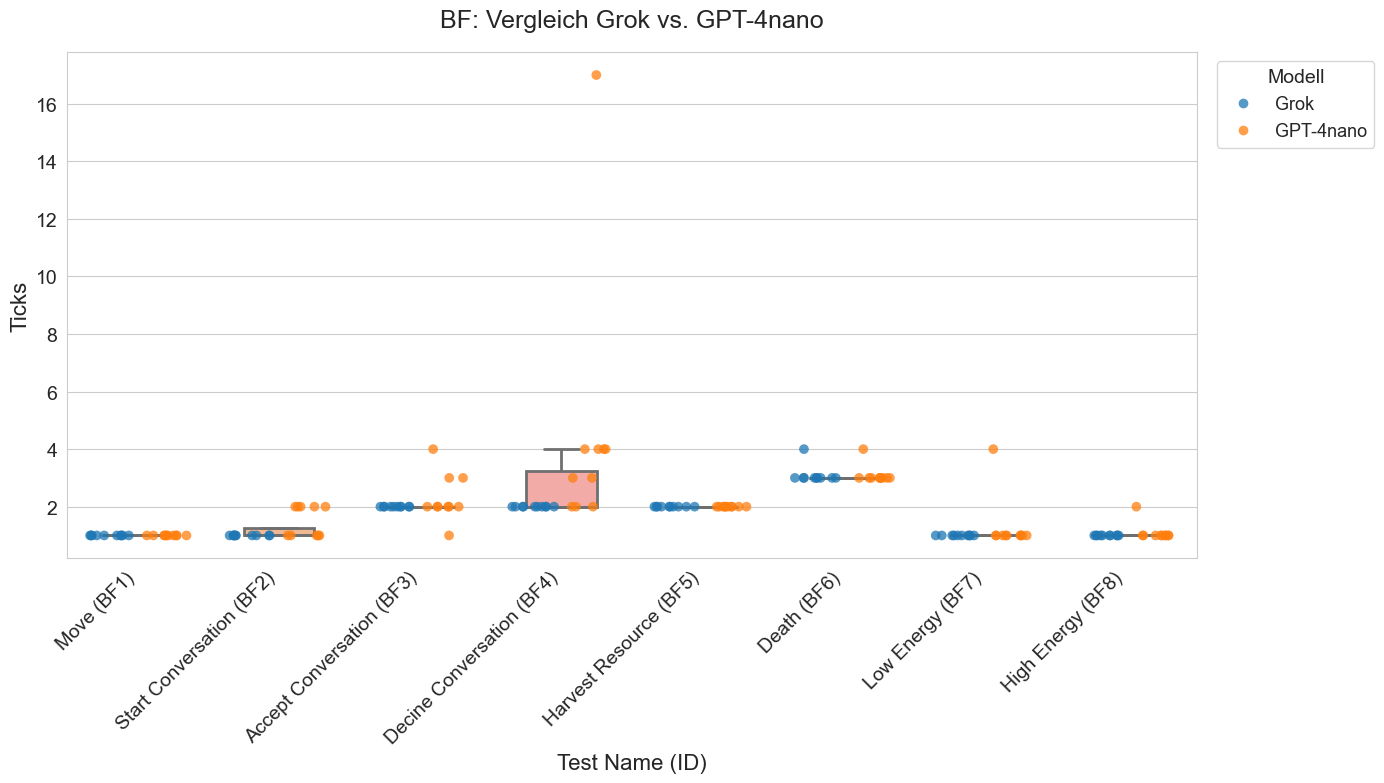

/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_73711/1308548918.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


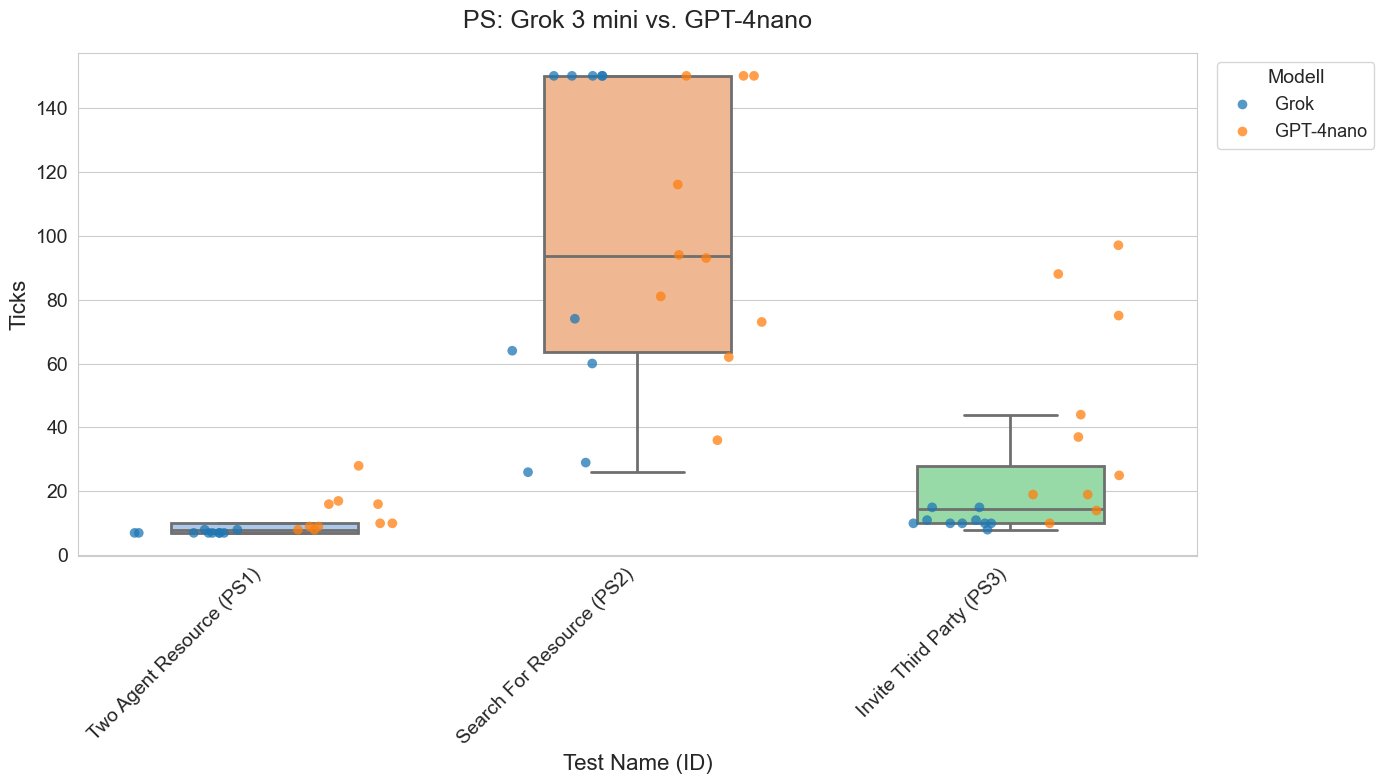

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- BF ---

# Load data and add model column
bf_grok = pd.read_csv("../simulation_results_bf_grok.csv")
bf_grok['model'] = 'Grok 3 mini'
bf_4nano = pd.read_csv("../simulation_results_bf_4nano.csv")
bf_4nano['model'] = 'GPT-4-nano'

# Standardize column names (remove underscores)
bf_grok.columns = [col.replace('_', '') for col in bf_grok.columns]
bf_4nano.columns = [col.replace('_', '') for col in bf_4nano.columns]

# Merge data
bf_all = pd.concat([bf_grok, bf_4nano], ignore_index=True)

# Order of test names
order = [
    "Move (BF1)",
    "Start Conversation (BF2)",
    "Accept Conversation (BF3)",
    "Decine Conversation (BF4)",
    "Harvest Resource (BF5)",
    "Death (BF6)",
    "Low Energy (BF7)",
    "High Energy (BF8)"
]

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Boxplot (without outliers)
sns.boxplot(
    x="testname", y="ticks", data=bf_all, order=order,
    palette="pastel", width=0.5, showfliers=False, linewidth=2
)
# Stripplot for better spacing
sns.stripplot(
    x="testname", y="ticks", data=bf_all, order=order,
    hue="model", palette={"Grok 3 mini": "#1f77b4", "GPT-4-nano": "#ff7f0e"},
    size=7, dodge=True, jitter=0.3, alpha=0.75
)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Test Name (ID)", fontsize=16)
plt.ylabel("Ticks", fontsize=16)
plt.title("BF: Grok 3 mini vs. GPT-4-nano", fontsize=18, pad=18)

# Place legend outside the plot
plt.legend(title="Model", fontsize=13, title_fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig("bf_grok_vs_4nano.png", dpi=300, bbox_inches='tight')
plt.show()

# --- PS ---

ps_grok = pd.read_csv("../simulation_results_ps_grok.csv")
ps_grok['model'] = 'Grok 3 mini'
ps_4nano = pd.read_csv("../simulation_results_ps_4nano.csv")
ps_4nano['model'] = 'GPT-4-nano'
ps_grok.columns = [col.replace('_', '') for col in ps_grok.columns]
ps_4nano.columns = [col.replace('_', '') for col in ps_4nano.columns]
ps_all = pd.concat([ps_grok, ps_4nano], ignore_index=True)
order_ps = [
    "Two Agent Resource (PS1)",
    "Search For Resource (PS2)",
    "Invite Third Party (PS3)"
]

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.boxplot(
    x="testname", y="ticks", data=ps_all, order=order_ps,
    palette="pastel", width=0.5, showfliers=False, linewidth=2
)
sns.stripplot(
    x="testname", y="ticks", data=ps_all, order=order_ps,
    hue="model", palette={"Grok 3 mini": "#1f77b4", "GPT-4-nano": "#ff7f0e"},
    size=7, dodge=True, jitter=0.3, alpha=0.75
)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Test Name (ID)", fontsize=16)
plt.ylabel("Ticks", fontsize=16)
plt.title("PS: Grok 3 mini vs. GPT-4-nano", fontsize=18, pad=18)
plt.legend(title="Model", fontsize=13, title_fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig("ps_grok_vs_4nano.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_73711/2315310986.py:36: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


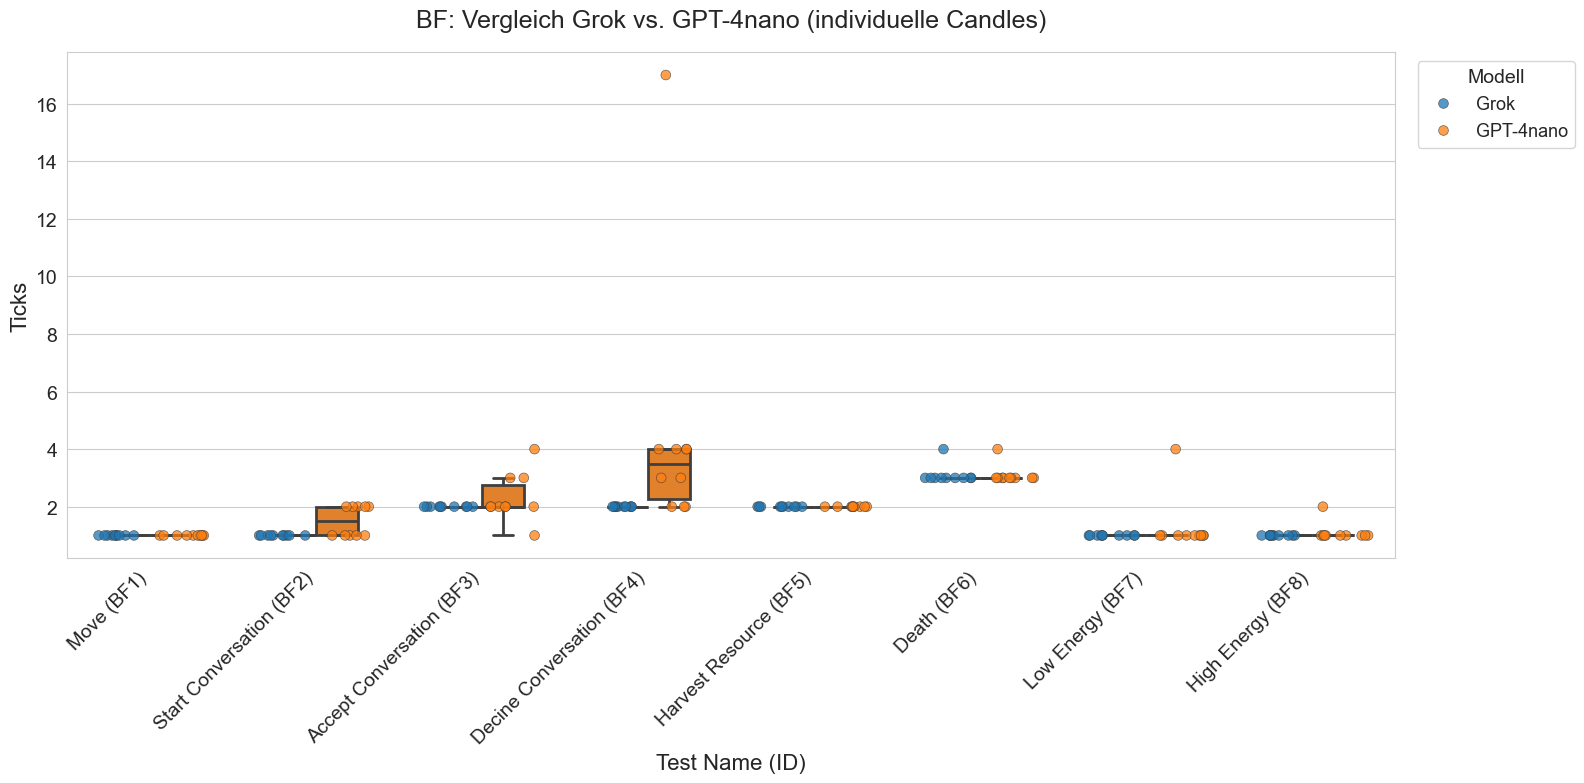

/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_73711/2315310986.py:73: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


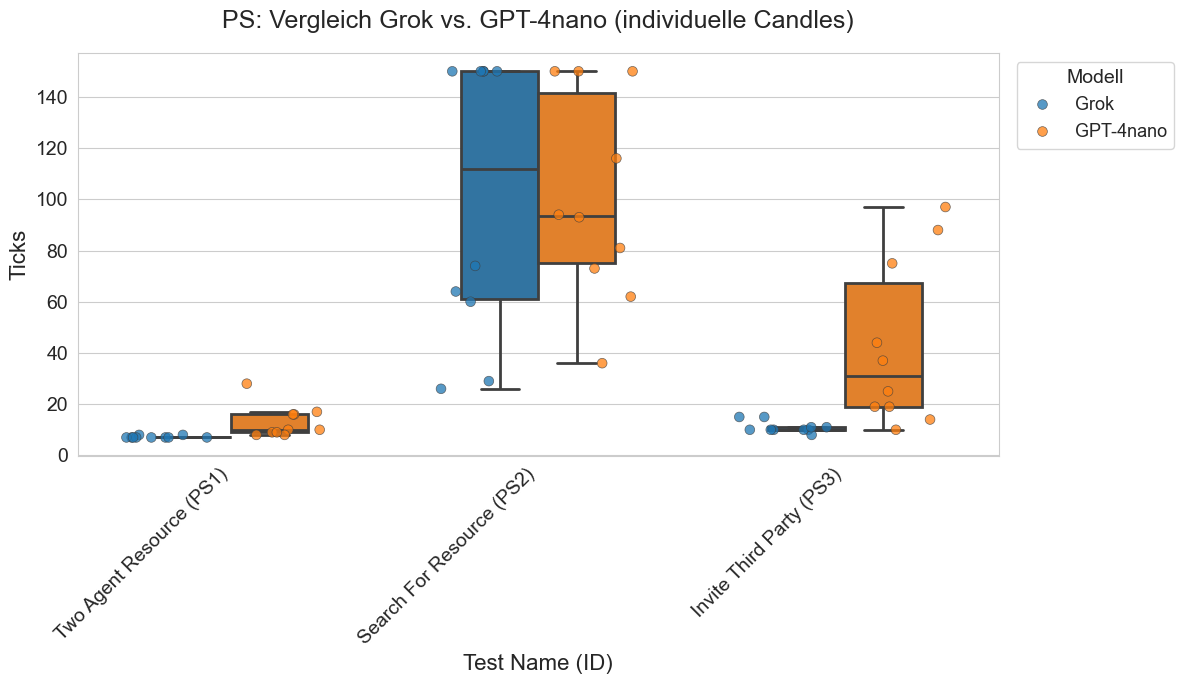

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- BF ---
# Load data and add model column
bf_grok = pd.read_csv("../simulation_results_bf_grok.csv")
bf_grok['model'] = 'Grok 3 mini'
bf_4nano = pd.read_csv("../simulation_results_bf_4nano.csv")
bf_4nano['model'] = 'GPT-4-nano'
bf_grok.columns = [col.replace('_', '') for col in bf_grok.columns]
bf_4nano.columns = [col.replace('_', '') for col in bf_4nano.columns]
bf_all = pd.concat([bf_grok, bf_4nano], ignore_index=True)

order = [
    "Move (BF1)",
    "Start Conversation (BF2)",
    "Accept Conversation (BF3)",
    "Decine Conversation (BF4)",
    "Harvest Resource (BF5)",
    "Death (BF6)",
    "Low Energy (BF7)",
    "High Energy (BF8)"
]

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Boxplot: model as hue, so for each testname two candles side by side
sns.boxplot(
    x="testname", y="ticks", hue="model", data=bf_all, order=order,
    palette={"Grok 3 mini": "#1f77b4", "GPT-4-nano": "#ff7f0e"}, width=0.5, showfliers=False, linewidth=2
)
# Stripplot for the points
sns.stripplot(
    x="testname", y="ticks", hue="model", data=bf_all, order=order,
    palette={"Grok 3 mini": "#1f77b4", "GPT-4-nano": "#ff7f0e"},
    size=7, dodge=True, jitter=0.3, alpha=0.75, marker='o', edgecolor='gray', linewidth=0.5
)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Test Name (ID)", fontsize=16)
plt.ylabel("Ticks", fontsize=16)
plt.title("BF: Grok 3 mini vs. GPT-4-nano (individual candles)", fontsize=18, pad=18)
# Only show one legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Model", fontsize=13, title_fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig("bf_grok_vs_4nano_individual.png", dpi=300, bbox_inches='tight')
plt.show()

# --- PS ---
ps_grok = pd.read_csv("../simulation_results_ps_grok.csv")
ps_grok['model'] = 'Grok 3 mini'
ps_4nano = pd.read_csv("../simulation_results_ps_4nano.csv")
ps_4nano['model'] = 'GPT-4-nano'
ps_grok.columns = [col.replace('_', '') for col in ps_grok.columns]
ps_4nano.columns = [col.replace('_', '') for col in ps_4nano.columns]
ps_all = pd.concat([ps_grok, ps_4nano], ignore_index=True)
order_ps = [
    "Two Agent Resource (PS1)",
    "Search For Resource (PS2)",
    "Invite Third Party (PS3)"
]
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.boxplot(
    x="testname", y="ticks", hue="model", data=ps_all, order=order_ps,
    palette={"Grok 3 mini": "#1f77b4", "GPT-4-nano": "#ff7f0e"}, width=0.5, showfliers=False, linewidth=2
)
sns.stripplot(
    x="testname", y="ticks", hue="model", data=ps_all, order=order_ps,
    palette={"Grok 3 mini": "#1f77b4", "GPT-4-nano": "#ff7f0e"},
    size=7, dodge=True, jitter=0.3, alpha=0.75, marker='o', edgecolor='gray', linewidth=0.5
)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Test Name (ID)", fontsize=16)
plt.ylabel("Ticks", fontsize=16)
plt.title("PS: Grok 3 mini vs. GPT-4-nano (individual candles)", fontsize=18, pad=18)
# Only show one legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Model", fontsize=13, title_fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig("ps_grok_vs_4nano_individual.png", dpi=300, bbox_inches='tight')
plt.show()